In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [3]:
# load the dataset
df = pd.read_csv('../data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
cat_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [5]:
# one-hot encode using pandas
df = pd.get_dummies(data=df, prefix=cat_variables, columns=cat_variables)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [6]:
features = [x for x in df.columns if x  not in 'HeartDisease']

In [7]:
# split the dataset
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size=0.8, random_state=42)

In [8]:
print(f"training sample: {len(X_train)}")
print(f"validation sample: {len(X_val)}")

training sample: 734
validation sample: 184


## Decision trees

In [27]:
# hyperparameter 
# min number of samples required to split
min_samples_split = [2, 10, 30, 50, 100, 200, 300, 700]
# max depth of the tree
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None] # None means there is no depth limit

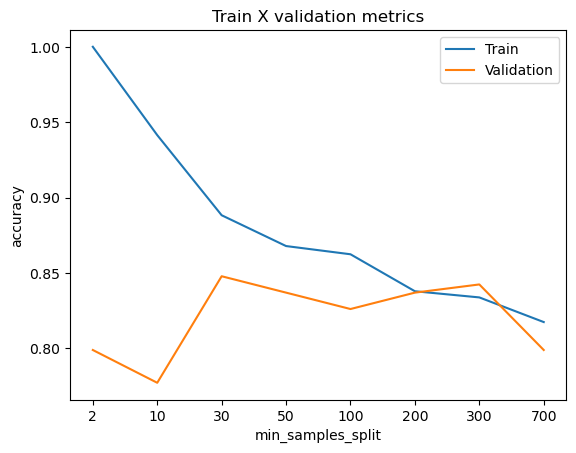

In [17]:
# tuning the hyperparameter min_samples_split to get the best one
accuarcy_train = []
accuracy_val  = []
for min_samples in min_samples_split:
    model = DecisionTreeClassifier(min_samples_split=min_samples, random_state=42)
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    acc_train = accuracy_score(prediction_train, y_train)
    acc_val = accuracy_score(prediction_val, y_val)
    accuarcy_train.append(acc_train)
    accuracy_val.append(acc_val)

plt.title('Train X validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split)), labels=min_samples_split)
plt.plot(accuarcy_train)
plt.plot(accuracy_val)
plt.legend(['Train', 'Validation'])

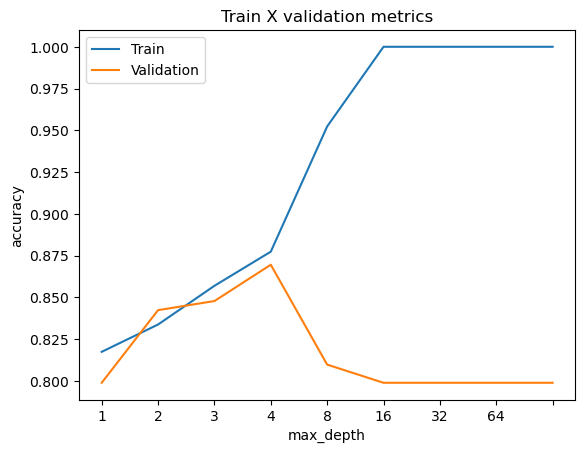

In [28]:
accuarcy_train = []
accuracy_val  = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    acc_train = accuracy_score(prediction_train, y_train)
    acc_val = accuracy_score(prediction_val, y_val)
    accuarcy_train.append(acc_train)
    accuracy_val.append(acc_val)

plt.title('Train X validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuarcy_train)
plt.plot(accuracy_val)
plt.legend(['Train', 'Validation'])

In [40]:
# choose
decision_tree = DecisionTreeClassifier(min_samples_split=50, max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=42)

In [41]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree.predict(X_train), y_train):.4f}")
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree.predict(X_val), y_val):.4f}")

Metrics train:
	Accuracy score: 0.8583
Metrics train:
	Accuracy score: 0.8370


## Random forest algorithm

In [43]:
min_samples_split = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
# number of decision trees
n_estimators_list = [10,50,100,500] 

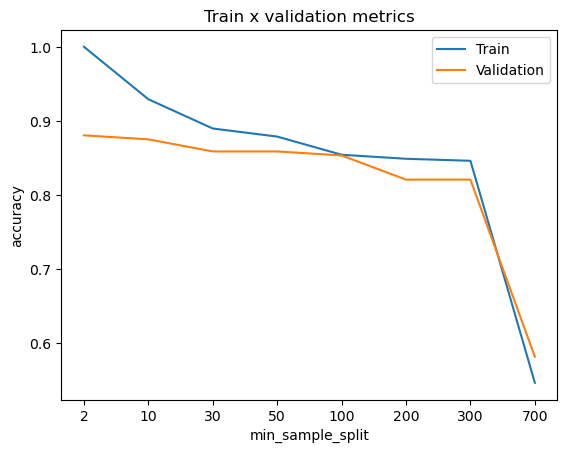

In [49]:
accuracy_train = []
accuracy_val = []
for min_samples in min_samples_split:
    model = RandomForestClassifier(min_samples_split=min_samples, random_state=42)
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    acc_train = accuracy_score(prediction_train, y_train)
    acc_val = accuracy_score(prediction_val, y_val)
    accuracy_train.append(acc_train)
    accuracy_val.append(acc_val)

plt.title('Train x validation metrics')
plt.xlabel('min_sample_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split)), labels=min_samples_split)
plt.plot(accuracy_train)
plt.plot(accuracy_val)
plt.legend(['Train', 'Validation'])

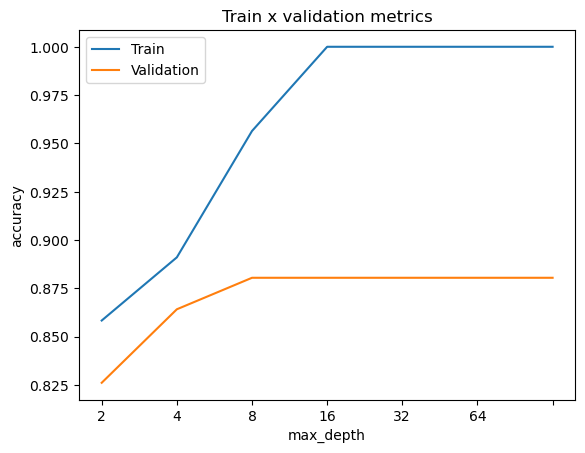

In [81]:
accuracy_train = []
accuracy_val = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    acc_train = accuracy_score(prediction_train, y_train)
    acc_val = accuracy_score(prediction_val, y_val)
    accuracy_train.append(acc_train)
    accuracy_val.append(acc_val)

plt.title('Train x validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_train)
plt.plot(accuracy_val)
plt.legend(['Train', 'Validation'])

In [80]:
# use best prameters after trying
rf_model = RandomForestClassifier(min_samples_split=10, max_depth=16, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=10)

In [79]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(rf_model.predict(X_train), y_train):.4f}")
print(f"Metircs test: \n\tAccuracy score: {accuracy_score(rf_model.predict(X_val), y_val):.4f}")

Metrics train:
	Accuracy score: 0.9278
Metircs test: 
	Accuracy score: 0.8750


## XGBoost

In [84]:
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=42)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10)


[0]	validation_0-logloss:0.62877
[1]	validation_0-logloss:0.58405
[2]	validation_0-logloss:0.54824
[3]	validation_0-logloss:0.51665
[4]	validation_0-logloss:0.48885
[5]	validation_0-logloss:0.46615
[6]	validation_0-logloss:0.44454
[7]	validation_0-logloss:0.42787
[8]	validation_0-logloss:0.41460
[9]	validation_0-logloss:0.40088
[10]	validation_0-logloss:0.38860
[11]	validation_0-logloss:0.38036
[12]	validation_0-logloss:0.36991
[13]	validation_0-logloss:0.36428
[14]	validation_0-logloss:0.35812
[15]	validation_0-logloss:0.35413
[16]	validation_0-logloss:0.34926
[17]	validation_0-logloss:0.34604
[18]	validation_0-logloss:0.34347
[19]	validation_0-logloss:0.33805
[20]	validation_0-logloss:0.33779
[21]	validation_0-logloss:0.33404
[22]	validation_0-logloss:0.33371
[23]	validation_0-logloss:0.33226
[24]	validation_0-logloss:0.33039
[25]	validation_0-logloss:0.32934
[26]	validation_0-logloss:0.32900
[27]	validation_0-logloss:0.32992
[28]	validation_0-logloss:0.32696
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [85]:
xgb_model.best_iteration

41

In [86]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9741
Metrics test:
	Accuracy score: 0.8859
